In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xpart as xp
import xcoll as xc
import apertls

In [2]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta2.json')

Loading line from dict:   0%|          | 0/36395 [00:00<?, ?it/s]

Done loading line from dict.           


In [45]:
line.get_elements_of_type(xt.Cavity)

([Cavity(voltage=4.5e+06, frequency=2e+08, lag=180, lag_taper=0, absolute_time=np.int64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
  Cavity(voltage=0, frequency=0, lag=0, lag_taper=0, absolute_time=np.int64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
  Cavity(voltage=0, frequency=0, lag=0, lag_taper=0, absolute_time=np.int64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
  Cavity(voltage=0, frequency=0, lag=0, lag_taper=0, absolute_time=np.int64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
  Cavity(voltage=0, frequency=0, lag=0, lag_taper=0, absolute_time=np.int64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
  Cavity(voltage=0, frequency=0, lag=0, lag_taper=0, absolute_time=np.int64(0), _sin_rot_s=-999, _cos_rot_s=-999, _shift_x=0, _shift_y=0, _shift_s=0),
  Cavity(voltage=3.6e+05, frequency=8e+08, lag=180, lag_taper=0, absolute_time=np.

In [3]:
line_ap_calc = apertls.ApertureCalculator(line)
x_extent = line_ap_calc.compute_x_extent()

x_min = x_extent[:,0]
x_max = x_extent[:,1]

In [6]:
tw = line.twiss()

In [8]:
tt = line.get_table()
mask = [el.startswith('Limit') for el in tt.element_type]
exn=2.0e-6
sigma_x = np.sqrt(tw.betx*exn/tw.gamma0)
sigma_x_restr = np.array([sigma_x[i] for i in range(len(sigma_x)) if mask[i]])

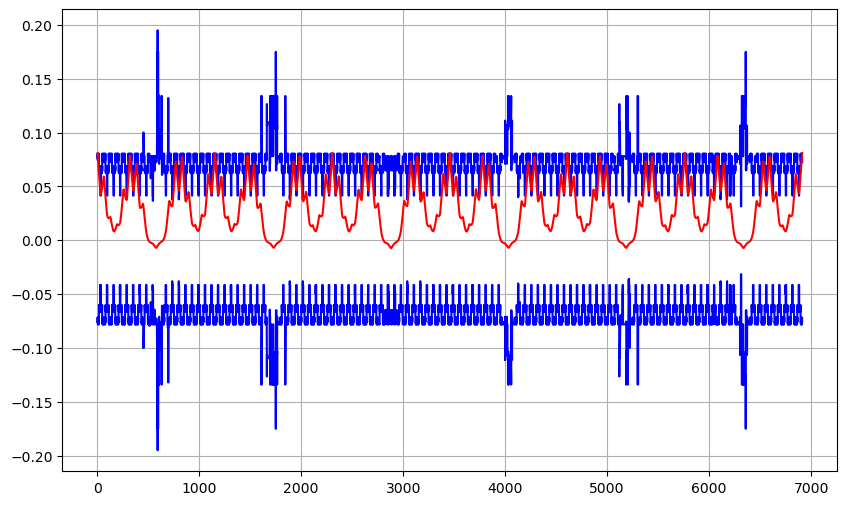

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tw.s[mask], x_min, label='x_min', color='blue')
ax.plot(tw.s[mask], x_max, label='x_max', color='blue')
ax.plot(tw.s[mask], sigma_x_restr + (6e-3 +3.85e-3)*tw.dx[mask], color='red')
ax.plot()
ax.grid()


In [14]:
line['bpcn.61108.a_aper']

View of LimitEllipse(a=0.038, b=0.038)

In [17]:
tw.rows['bpcn.61108.a_aper'].betx[0]

np.float64(33.04593831384703)

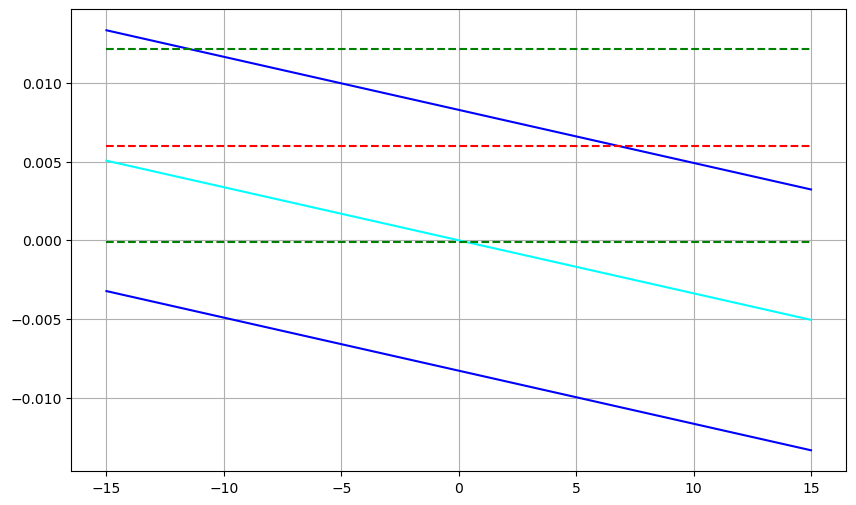

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
n = np.linspace(-15, 15, 10000)
ax.plot(n, (line['bpcn.61108.a_aper'].a - n*np.sqrt(tw.rows['bpcn.61108.a_aper'].betx*exn/tw.gamma0))/tw.rows['bpcn.61108.a_aper'].dx, color='blue')
ax.plot(n, (-line['bpcn.61108.a_aper'].a - n*np.sqrt(tw.rows['bpcn.61108.a_aper'].betx*exn/tw.gamma0))/tw.rows['bpcn.61108.a_aper'].dx, color='blue')
ax.plot(n, (- n*np.sqrt(tw.rows['bpcn.61108.a_aper'].betx*exn/tw.gamma0))/tw.rows['bpcn.61108.a_aper'].dx, color='cyan')
ax.hlines(0+6e-3, n[0], n[-1], color='red', linestyle='--')
ax.hlines(-6.12e-3+6e-3, n[0], n[-1], color='green', linestyle='--')
ax.hlines(6.12e-3+6e-3, n[0], n[-1], color='green', linestyle='--')
ax.grid()

In [29]:
tw.rows['bpcn.61108.a_aper'].dx

array([4.5869142])

In [36]:
tw.rows['.*tidp.*'].betx

array([102.30841303, 102.30841303,  87.22699693])

In [44]:
tw.rows['.*tidp.*'].dx

array([3.03424953, 3.03424953, 2.6563911 ])

In [37]:
line2 = xt.Line.from_json('../../injection_lines/injection_thin_approx_ap_with_deferred_expressions.json')

Loading line from dict:   0%|          | 0/31362 [00:00<?, ?it/s]

Done loading line from dict.           


In [38]:
tw2 = line2.twiss()

In [43]:
tw2.rows['.*tidp.*'].dx

array([2.8610629])